# King County Dataset Linear Regression Model 5

### In this model I am going to try again without 'grade' and 'sqft_above', remove the NaN's, and then log transform some of the right skewed features that have outliers.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
# Perform log transformation
logbedrooms = np.log(data["bedrooms"])
logliving = np.log(data["sqft_living"])
loglot = np.log(data["sqft_lot"])
loglivingnear = np.log(data["sqft_living15"])
loglotnear = np.log(data["sqft_lot15"])

# Switch the Standardization into the original data
data["bedrooms"] = (logbedrooms-np.mean(logbedrooms))/np.sqrt(np.var(logbedrooms))
data["sqft_living"] = (logliving-np.mean(logliving))/np.sqrt(np.var(logliving))
data["sqft_lot"] = (loglot-np.mean(loglot))/np.sqrt(np.var(loglot))
data["sqft_living15"] = (loglivingnear-np.mean(loglivingnear))/np.sqrt(np.var(loglivingnear))
data["sqft_lot15"] = (loglotnear-np.mean(loglotnear))/np.sqrt(np.var(loglotnear))


# Account for missing data
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)
data.view.fillna(value=data.view.median(), inplace = True)
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)

In [15]:
# Trying it without grade and sqft above.
X = data.drop(["date","sqft_basement", "grade", "sqft_above"], axis=1)
y = pd.DataFrame(data, columns = ['price'])

In [16]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [17]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [19]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 2.6414320044954082e-20
Test Mean Squarred Error: 2.6879531789931154e-20


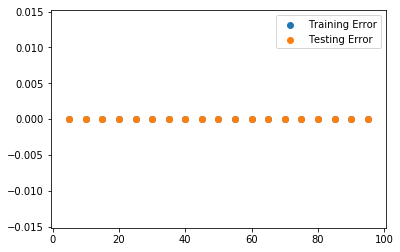

In [20]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-1.312259089163678e-19

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "price ~ id+bedrooms+bathrooms+sqft_living+sqft_lot+floors+yr_renovated+view+waterfront+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15"

model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     2125.
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:57:51   Log-Likelihood:            -2.9760e+05
No. Observations:               21597   AIC:                         5.952e+05
Df Residuals:                   21581   BIC:                         5.954e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       9.07e+06   3.41e+06      2.661      0.008    2.39e+06    1.58e+07
id            -1.439e-06   5.63e-07     -2.554      0.011   -2.54e-06   -3.35e-07
bedrooms      -4.214e+04   2155.244    -19.550      0.000   -4.64e+04   -3.79e+04
bathrooms      1.112e+05   3676.440     30.236      0.000    1.04e+05    1.18e+05
sqft_living    1.341e+05   3494.795     38.377      0.000    1.27e+05    1.41e+05
sqft_lot       2929.7201   2617.690      1.119      0.263   -2201.146    8060.586
floors         4.499e+04   3954.587     11.377      0.000    3.72e+04    5.27e+04
yr_renovated     18.5214      4.558      4.064      0.000       9.588      27.455
view           7.349e+04   2411.706     30.472      0.000    6.88e+04    7.82e+04
waterfront     6.379e+05   2.11e+04     30.291      0.000    5.97e+05    6.79e+05
yr_built      -2510.6033     76.897    -32.649      0.000   -2661.328   -2359.879
zipcode        -688.3327     38.116    -18.059      0.000    -763.042    -613.623
lat            6.847e+05   1.23e+04     55.562      0.000    6.61e+05    7.09e+05
long           -2.54e+05   1.53e+04    -16.629      0.000   -2.84e+05   -2.24e+05
sqft_living15  6.399e+04   2562.401     24.975      0.000     5.9e+04     6.9e+04
sqft_lot15        0.0101      0.078      0.130      0.896      -0.142       0.163
==============================================================================
Omnibus:                    20249.378   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2598945.947
Skew:                           4.130   Prob(JB):                         0.00
Kurtosis:                      56.103   Cond. No.                     1.16e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results

R-squared:	0.596. The more I do the worst it gets!